In [1]:
#Lasso Regression Method

In [164]:
   
# Importing libraries 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

In [165]:
salary_data = pd.read_csv("salary_data.csv")

In [166]:
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [167]:
salary_data.iloc[2:5]

,YearsExperience,Salary
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [168]:
X, y = salary_data.iloc[:,:-1].values, salary_data.iloc[:,1].values

In [169]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [170]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [195]:
class LassoRegression():
    def __init__(self, learning_rate, iterations, l1_penalty): 
        self.learning_rate = learning_rate 
        self.iterations = iterations 
        self.l1_penalty = l1_penalty 
        
    def fit(self,X,y):
        self.m,self.n = X.shape
        self.X = X
        self.y = y
        self.W = np.zeros(self.n)
        self.b = 0
        
        for _ in range(self.iterations):
            self.update_weights()
        return self
    def update_weights(self):
        
        y_pred = self.predict(self.X)
        
        dw = np.zeros(self.n)
        db = 0
        
        error = self.y - y_pred
        
        for i in range(self.n):
            
            if( self.W[i] > 0):
                dw[i] = -1/self.m * ((self.X[:,i]).dot(error) + self.l1_penalty)
            else:
                dw[i] = -1/self.m * ((self.X.T).dot(error) - self.l1_penalty)
            
        db = -1/(self.m) * np.sum(self.y - y_pred)
        
        self.W = self.W - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        return self
    def predict(self, X):
        return X.dot(self.W) + self.b

Predicted values:  [ 33826.75 135100.08  63748.42]
Real values:	  [ 37731 122391  57081]
Trained W:	  32110.42
Trained b:	  77711.86


C:\Users\harsh\AppData\Local\Temp\ipykernel_25020\3044033205.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dw[i] = -1/self.m * ((self.X.T).dot(error) - self.l1_penalty)


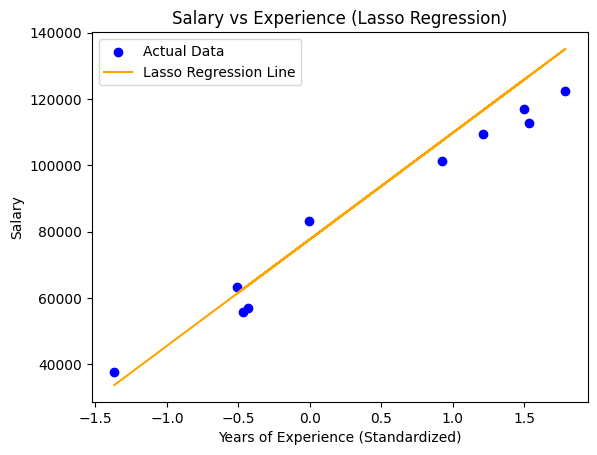

In [198]:
def main(): 
	# Importing dataset 
	df = pd.read_csv("salary_data.csv") 
	X = df.iloc[:, :-1].values 
	Y = df.iloc[:, 1].values 

	# Standardize features 
	scaler = StandardScaler() 
	X = scaler.fit_transform(X) 

	# Splitting dataset into train and test set 
	X_train, X_test, Y_train, Y_test = train_test_split( 
		X, Y, test_size=1/3, random_state=0) 

	# Model training 
	model = LassoRegression( 
		iterations=1000, learning_rate=0.01, l1_penalty=100000) 
	model.fit(X_train, Y_train) 

	# Prediction on test set 
	Y_pred = model.predict(X_test) 

	print("Predicted values: ", np.round(Y_pred[:3], 2)) 
	print("Real values:	 ", Y_test[:3]) 
	print("Trained W:	 ", round(model.W[0], 2)) 
	print("Trained b:	 ", round(model.b, 2)) 

	# Visualization on test set 
	plt.scatter(X_test, Y_test, color='blue', label='Actual Data') 
	plt.plot(X_test, Y_pred, color='orange', label='Lasso Regression Line') 
	plt.title('Salary vs Experience (Lasso Regression)') 
	plt.xlabel('Years of Experience (Standardized)') 
	plt.ylabel('Salary') 
	plt.legend() 
	plt.show() 


if __name__ == "__main__": 
	main() 
